# Group-based Regression Models

### Importing libraries and define functions

In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import os
import sys

In [2]:
# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

In [3]:
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [4]:
from pycaret.regression import *

In [5]:
import functions as f

# Quantum dots regression model

In [6]:
model_name = "quantum_dot"
group_name = "quantum_dots"
seed = 123

### Load the data and filter instances

In [7]:
data_train_df = pd.read_csv("output/datasets/universal/data_regression_train_df.csv", encoding="utf-8")
data_test_df = pd.read_csv("output/datasets/universal/data_regression_test_df.csv", encoding="utf-8")
data_df = pd.concat([data_train_df,data_test_df])

del data_train_df
del data_test_df

In [8]:
data_df.shape

(11315, 20)

In [9]:
data_group_df = data_df[data_df['nanomaterial_group'] == group_name]

In [10]:
data_group_df.shape

(3013, 20)

In [11]:
data_group_df.head()

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group,Viability
0,CdTe,nucleic_acids,3.85,NaN,NaN,NaN,NaN,2.40,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,quantum_dots,40.0
2,CdTe,None,4.50,NaN,NaN,NaN,NaN,0.30,120.0,HeLa,Human,Cervix,Epithelial,Adult,cancer,female,MTT,TetrazoliumSalt,quantum_dots,22.7
4,CdTe,None,4.50,NaN,NaN,NaN,NaN,3.00,48.0,K562,Human,BoneMarrow,Lymphoblast,Adult,cancer,female,MTT,TetrazoliumSalt,quantum_dots,99.0
7,CdTe,None,2.60,NaN,NaN,NaN,NaN,0.08,24.0,PC12,Rat,Adrenal-gland,Irregular,Adult,cancer,male,MTT,TetrazoliumSalt,quantum_dots,25.0
8,CdTe,None,5.30,NaN,NaN,NaN,NaN,0.02,12.0,HL-7702,Human,Liver,Hepatocyte,NaN,Normal,NaN,MTT,TetrazoliumSalt,quantum_dots,89.5


### Create training set and test set

In [12]:
data_group_df = f.quantile_discretize(data_group_df, 'Viability')

In [13]:
splitter = setup(data = data_group_df, target = 'Viability_discrete',
                 preprocess = False,
                 train_size=0.8,
                 data_split_stratify=True,
                 # don't change the following
                 session_id = seed,
                 use_gpu=False,
                 log_experiment = False,
                 silent=True,
                 experiment_name = 'splitter')

,Description,Value
0,session_id,123
1,Target,Viability_discrete
2,Original Data,"(3013, 21)"
3,Missing Values,True
4,Numeric Features,5
5,Categorical Features,15
6,Transformed Train Set,"(2410, 18)"
7,Transformed Test Set,"(603, 18)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,True


In [14]:
data_group_train_df = get_config(variable="X_train").copy()
#data_group_train_df['Viability'] = get_config(variable="y_train").copy()

data_group_test_df = get_config(variable="X_test").copy()
#data_group_test_df['Viability'] = get_config(variable="y_test").copy()

In [15]:
print(data_group_train_df.shape)
print(data_group_test_df.shape)

(2410, 18)
(603, 18)


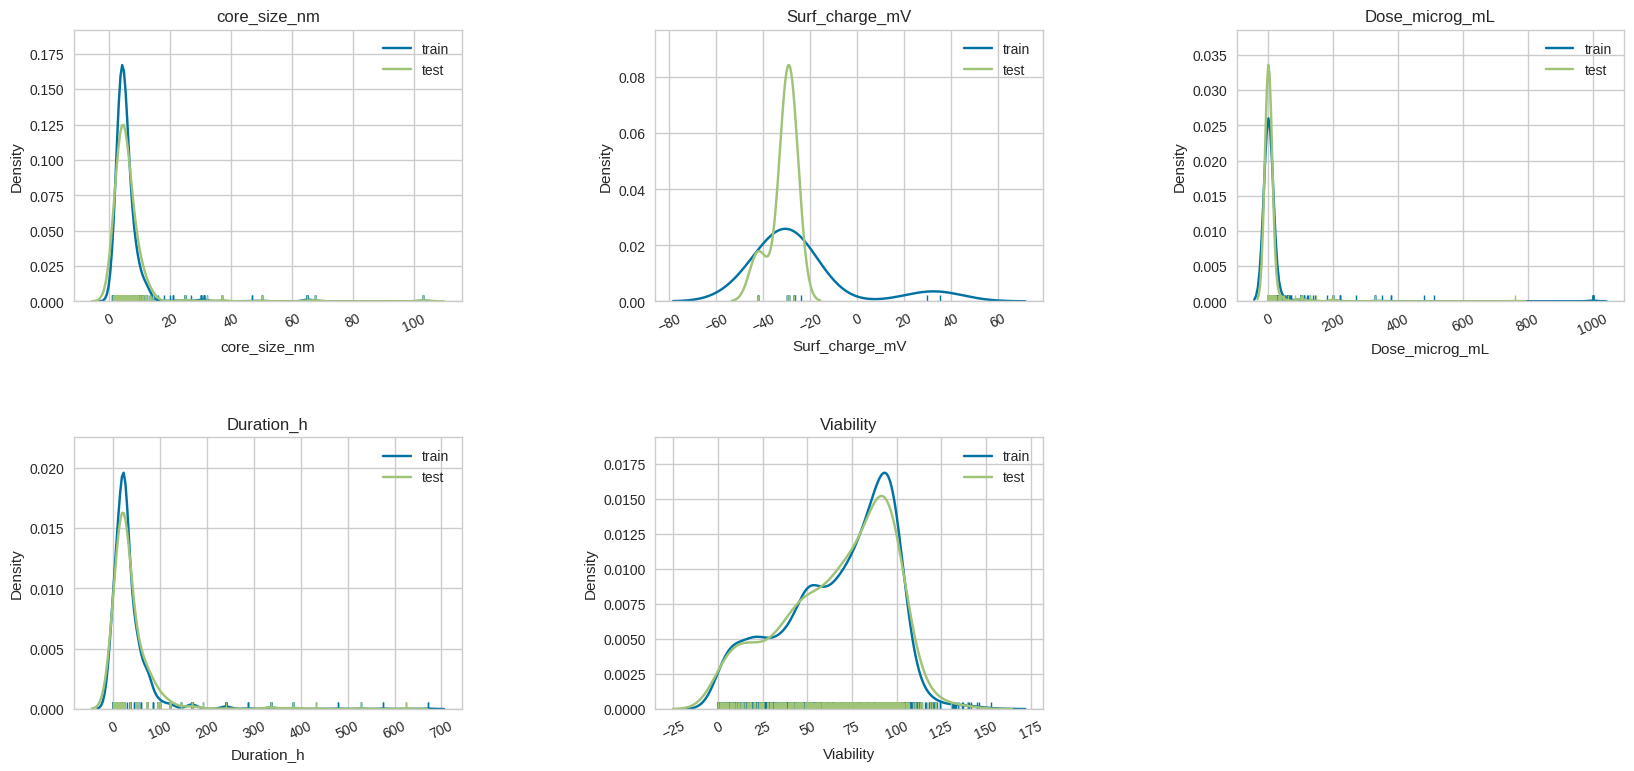

In [16]:
f.plot_distribution_train_test(data_group_train_df, data_group_test_df)

### Save cleaned datasets

In [21]:
data_group_train_df.to_csv('output/datasets/'+model_name+'/data_regression_'+model_name+'_train_df.csv', encoding='utf-8', index=False)

In [22]:
data_group_test_df.to_csv('output/datasets/'+model_name+'/data_regression_'+model_name+'_test_df.csv', encoding='utf-8', index=False)

### Use the best scenario identified in step 01

In [25]:
sc_ignore_features = ['nanomaterial_group', 'Coating', 'Cell_name']
sc_bin_numeric_features = None
sc_high_cardinality_features = None

sc_imputation_type = 'iterative'
sc_numeric_imputation = 'mean'

sc_normalize = True
sc_remove_outliers = True

### Data Preprcoessing

In [26]:
stup = setup(data = data_group_train_df, target = 'Viability', 
              
        test_data = data_group_test_df,

        imputation_type = sc_imputation_type, 
        numeric_imputation = sc_numeric_imputation, #default: mean

        categorical_imputation = "constant", #default: constant
        iterative_imputation_iters = 5, #default: 5
        numeric_iterative_imputer = "lightgbm",
        categorical_iterative_imputer = "lightgbm",

        ignore_features = sc_ignore_features,
        bin_numeric_features = sc_bin_numeric_features,
        high_cardinality_features = sc_high_cardinality_features,

        high_cardinality_method = "frequency", #default: frequency
        handle_unknown_categorical = True, #default
        unknown_categorical_method = "least_frequent", #default

        normalize = sc_normalize, #default: False
        remove_outliers= sc_remove_outliers, #default: False

        outliers_threshold = 0.05, #default

        transformation= False, #default
        transformation_method = 'yeo-johnson', #default
        transform_target = False, 
        combine_rare_levels = False,
        rare_level_threshold = 0.1, #default: 0.1

        remove_multicollinearity = False, #default 
        multicollinearity_threshold = 0.9, #default

        ignore_low_variance = True, 

        feature_interaction = False, 
        feature_ratio = False,
        polynomial_features = False, 
        trigonometry_features = False,

        # don't change the following
        session_id = seed,
        use_gpu=False,
        log_experiment = False,
        silent=True,
        experiment_name = model_name)

set_config('seed', seed)

,Description,Value
0,session_id,123
1,Target,Viability
2,Original Data,"(2410, 18)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2279, 104)"


In [27]:
print(get_config(variable="X_train").shape)
print(get_config(variable="y_train").shape)

(2279, 104)
(2279,)


In [28]:
print(get_config(variable="X").shape)
print(get_config(variable="y").shape)

(2410, 104)
(2410,)


In [29]:
set_config('X_train', get_config(variable="X").copy()) 
set_config('y_train', get_config(variable="y").copy()) 

In [30]:
print(get_config(variable="X_train").shape)
print(get_config(variable="y_train").shape)

(2410, 104)
(2410,)


In [31]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(603, 104)
(603,)


In [32]:
#load_config('output/models/universal_regression_rf.cfg')

In [33]:
data_group_train_transformed_df = get_config(variable="X").copy()
data_group_train_transformed_df['Viability'] = get_config(variable="y").copy()

In [34]:
data_group_test_transformed_df = get_config(variable="X_test").copy()
data_group_test_transformed_df['Viability'] = get_config(variable="y_test").copy()

In [35]:
data_group_train_transformed_df.to_csv('output/datasets/'+model_name+'/transformed/data_regression_'+model_name+'_train_transformed_df.csv', encoding='utf-8', index=False)
data_group_test_transformed_df.to_csv('output/datasets/'+model_name+'/transformed/data_regression_'+model_name+'_test_transformed_df.csv', encoding='utf-8', index=False)

### Model Comparison

In [36]:
top_model = compare_models(exclude=['lar','llar'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,17.7424,556.0196,23.5378,0.3788,0.6532,0.8861,0.0320
catboost,CatBoost Regressor,17.8769,557.7700,23.5633,0.3772,0.6518,0.8688,2.5930
xgboost,Extreme Gradient Boosting,17.4074,569.2234,23.8130,0.3622,0.6422,0.7971,0.2230
rf,Random Forest Regressor,17.3149,571.2084,23.8422,0.3602,0.6415,0.8165,0.2210
gbr,Gradient Boosting Regressor,20.6768,665.1812,25.7463,0.2583,0.7139,1.0936,0.0610
knn,K Neighbors Regressor,20.0010,691.0673,26.2540,0.2264,0.7030,0.9547,0.0170
et,Extra Trees Regressor,18.3394,707.7372,26.5448,0.2051,0.6919,0.7626,0.2390
ridge,Ridge Regression,22.7462,792.0037,28.1031,0.1166,0.7590,1.2128,0.0080
br,Bayesian Ridge,23.0186,795.4871,28.1701,0.1127,0.7639,1.2344,0.0110
huber,Huber Regressor,22.3771,824.8616,28.6695,0.0806,0.7725,1.2738,0.0700


In [37]:
results_df = pull()

results_df = results_df.reset_index(level=0)

results_df.to_csv('output/models_results/'+model_name+'/' + model_name + '_regression_model_comparison_results.tsv', 
                index=False, encoding="utf-8", sep="\t")

In [38]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(603, 104)
(603,)


In [39]:
print(results_df.iloc[0,0])

lightgbm


### 10-fold cross-validation of the best performing model

In [40]:
model = create_model(results_df.iloc[0,0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16.4273,489.2167,22.1182,0.4612,0.5643,0.6909
1,17.3946,535.0793,23.1318,0.4139,0.6313,0.8890
2,19.7961,728.9913,26.9998,0.2668,0.8861,1.2977
3,17.5665,559.7111,23.6582,0.3840,0.6932,0.7835
4,18.2098,581.9013,24.1226,0.4444,0.6347,0.7733
5,17.8726,523.3231,22.8763,0.4036,0.6620,0.6733
6,16.7878,487.6618,22.0831,0.3449,0.5576,0.7182
7,16.5635,487.8428,22.0872,0.3929,0.5747,0.6884
8,18.3118,584.9112,24.1849,0.3905,0.7399,1.7648


In [41]:
results_df = pull()

results_df = results_df.reset_index(level=0)

results_df.to_csv('output/models_results/'+model_name+'/' + model_name + '_regression_model_cross_validation_results.tsv', 
                index=False, encoding="utf-8", sep="\t")

In [42]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(603, 104)
(603,)


### Finalize the model

In [43]:
final_model = finalize_model(model)

In [44]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(603, 104)
(603,)


### Test the model on the test set

In [45]:
pred_test_set = predict_model(final_model, data=data_group_test_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,17.1439,507.9254,22.5372,0.4398,0.6623,0.9035


In [46]:
results_df = pull()

results_df = results_df.reset_index(level=0)

results_df.to_csv('output/models_results/'+model_name+'/' + model_name + '_regression_model_test_set_validation_results.tsv', 
                index=False, encoding="utf-8", sep="\t")

In [47]:
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,17.1439,507.9254,22.5372,0.4398,0.6623,0.9035


,core_size_nm,Dose_microg_mL,Duration_h,NP_type_CdHgTe,NP_type_CdS,NP_type_CdSe,NP_type_CdSeS,NP_type_CdSeTe,NP_type_CdTe,NP_type_CdTeS,...,Assay_WST-1,Assay_XTT,Assay_induction-of-autophagy,Test_indicator_CalceinAM,Test_indicator_Impedance,Test_indicator_TetrazoliumSalt,Test_indicator_resazurin/sulforhodamine_B,Test_indicator_toluylene red,Viability,Label
0,-0.426618,-0.136240,-0.219777,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,96.970001,76.978736
1,-0.289193,-0.140668,0.233216,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,51.470001,49.532727
2,-0.401377,-0.083113,-0.219777,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,101.000000,67.721325
3,-0.289193,-0.139192,-0.219777,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,74.000000,71.340801
4,-0.148963,-0.140963,-0.219777,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100.000000,69.186571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-0.205055,-0.140225,-0.521773,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,58.500000,64.949560
599,-0.377538,-0.137864,-0.257526,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,77.000000,37.359505
600,-0.289193,-0.140668,-0.597272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.000000,82.758419
601,-0.289193,-0.134174,-0.219777,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,90.019997,75.907403


### Inspect model plots

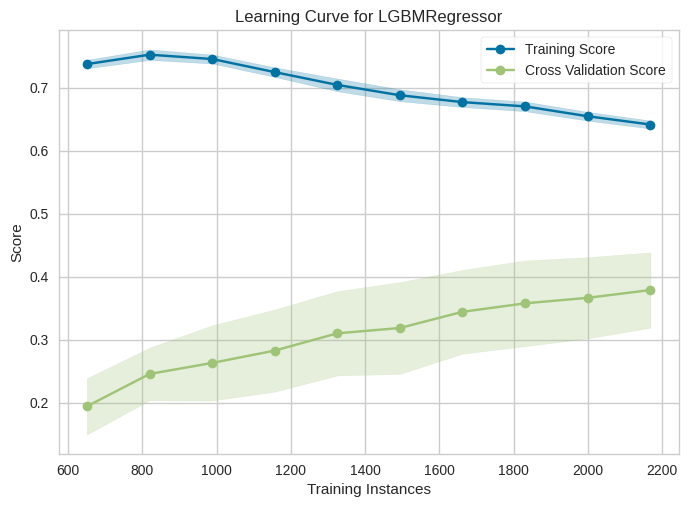

In [48]:
plot_model(final_model, plot = 'learning')

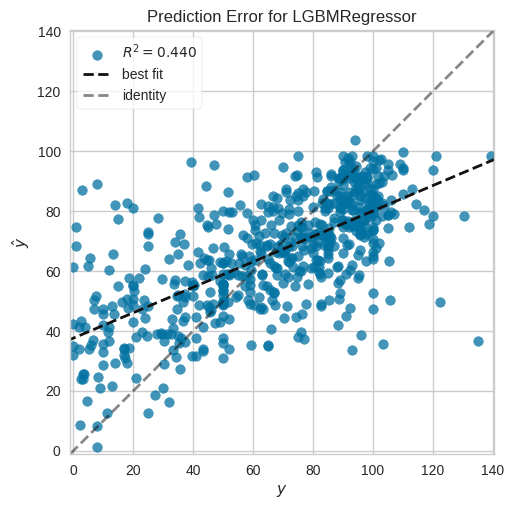

In [49]:
plot_model(final_model, plot = 'error')

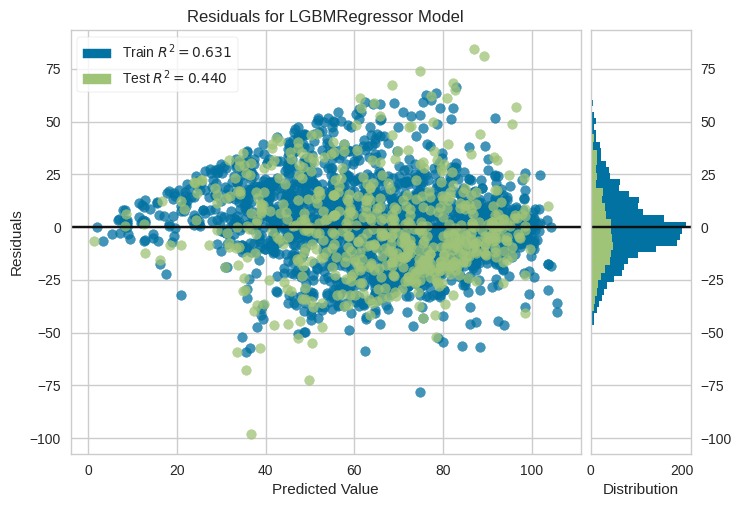

In [50]:
plot_model(final_model, plot = 'residuals')

### Feature importance plot

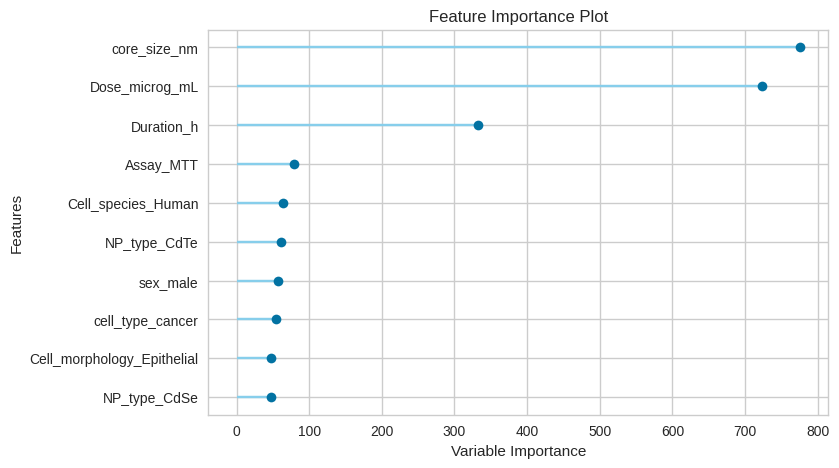

In [51]:
plot_model(final_model, plot = 'feature')

### Save the model to file

In [52]:
save_config('output/models/'+model_name+'_regression_config.cfg')

In [53]:
save_model(final_model, 'output/models/'+model_name+'_regression_model.mdl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['nanomaterial_group',
                                                        'Coating', 'Cell_name'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Viability',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_